In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [3]:
path  = 'D:/Dataset/Currency/'

df = pd.read_csv(path+'Data Historis.csv', sep = ';', index_col = 'Tanggal', decimal = ',')
df.head()

,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
Tanggal,,,,,,
01/01/2021,"29.359,90","28.951,70","29.627,10","28.712,40","100,90K","1,42%"
02/01/2021,"32.193,30","29.359,70","33.233,50","29.008,00","240,87K","9,65%"
03/01/2021,"32.958,90","32.192,90","34.755,90","32.029,60","155,21K","2,38%"
04/01/2021,"32.022,60","33.016,60","33.587,50","28.204,50","255,27K","-2,84%"
05/01/2021,"33.991,50","32.015,40","34.414,70","30.010,50","202,13K","6,15%"


#  Data Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1248 entries, 01/01/2021 to 01/06/2024
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Terakhir    1248 non-null   object
 1   Pembukaan   1248 non-null   object
 2   Tertinggi   1248 non-null   object
 3   Terendah    1248 non-null   object
 4   Vol.        1248 non-null   object
 5   Perubahan%  1248 non-null   object
dtypes: object(6)
memory usage: 68.2+ KB


In [5]:
df['Perubahan%'] = df['Perubahan%'].str.replace('%','',regex=True)

In [6]:
df.head()

,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
Tanggal,,,,,,
01/01/2021,"29.359,90","28.951,70","29.627,10","28.712,40","100,90K","1,42"
02/01/2021,"32.193,30","29.359,70","33.233,50","29.008,00","240,87K","9,65"
03/01/2021,"32.958,90","32.192,90","34.755,90","32.029,60","155,21K","2,38"
04/01/2021,"32.022,60","33.016,60","33.587,50","28.204,50","255,27K","-2,84"
05/01/2021,"33.991,50","32.015,40","34.414,70","30.010,50","202,13K","6,15"


In [7]:
number_type = ['Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah', 'Perubahan%']

for i in range(len(number_type)):
    if(number_type[i] == 'Perubahan%'):
        df['Perubahan%'] = df['Perubahan%'].apply(lambda x : x.replace(',','.'))
    else:
        df[number_type[i]] = df[number_type[i]].apply(lambda x : x.replace('.',''))
        df[number_type[i]] = df[number_type[i]].apply(lambda x : x.replace(',','.'))

In [8]:
df.head()

,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
Tanggal,,,,,,
01/01/2021,29359.90,28951.70,29627.10,28712.40,"100,90K",1.42
02/01/2021,32193.30,29359.70,33233.50,29008.00,"240,87K",9.65
03/01/2021,32958.90,32192.90,34755.90,32029.60,"155,21K",2.38
04/01/2021,32022.60,33016.60,33587.50,28204.50,"255,27K",-2.84
05/01/2021,33991.50,32015.40,34414.70,30010.50,"202,13K",6.15


In [9]:
for i in range(len(number_type)):
    df[number_type[i]] = df[number_type[i]].astype('float64')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1248 entries, 01/01/2021 to 01/06/2024
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Terakhir    1248 non-null   float64
 1   Pembukaan   1248 non-null   float64
 2   Tertinggi   1248 non-null   float64
 3   Terendah    1248 non-null   float64
 4   Vol.        1248 non-null   object 
 5   Perubahan%  1248 non-null   float64
dtypes: float64(5), object(1)
memory usage: 68.2+ KB


In [11]:
df.describe()

,Terakhir,Pembukaan,Tertinggi,Terendah,Perubahan%
count,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000
mean,37713.299199,37682.553125,38570.080449,36728.577885,0.124255
std,14561.243190,14538.231245,14920.587488,14106.966688,3.352327
min,15776.200000,15776.600000,16274.600000,15504.200000,-15.630000
25%,26336.875000,26336.550000,26734.200000,25937.650000,-1.375000
50%,36005.950000,35850.150000,37402.950000,34741.500000,-0.015000
75%,47124.350000,47123.975000,48336.800000,46119.850000,1.640000
max,73066.300000,73066.700000,73740.900000,71338.400000,19.410000


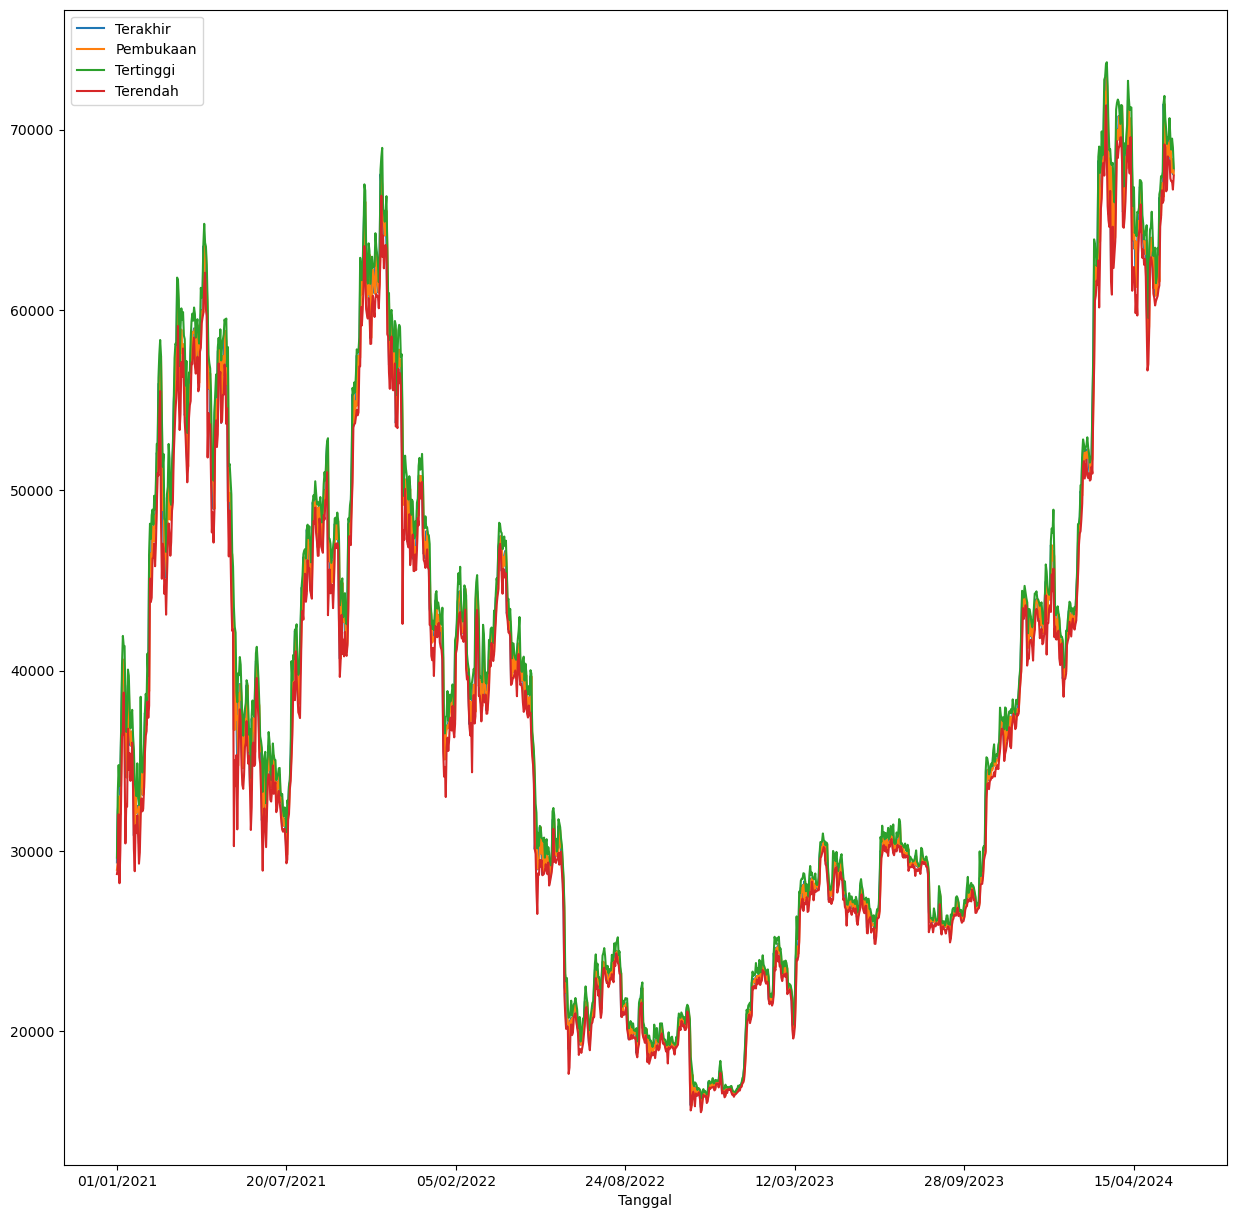

In [12]:
df.plot(y = ['Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah'], kind="line", figsize = (15,15))
plt.show()

C:\Users\MSI-GAMING\AppData\Local\Temp\ipykernel_15984\4197755197.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\MSI-GAMING\AppData\Local\Temp\ipykernel_15984\4197755197.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\MSI-GAMING\AppData\Local\Temp\ipykernel_15984\4197755197.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\MSI-GAMING\AppData\Local\Temp\ipykernel_15984\4197755197.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


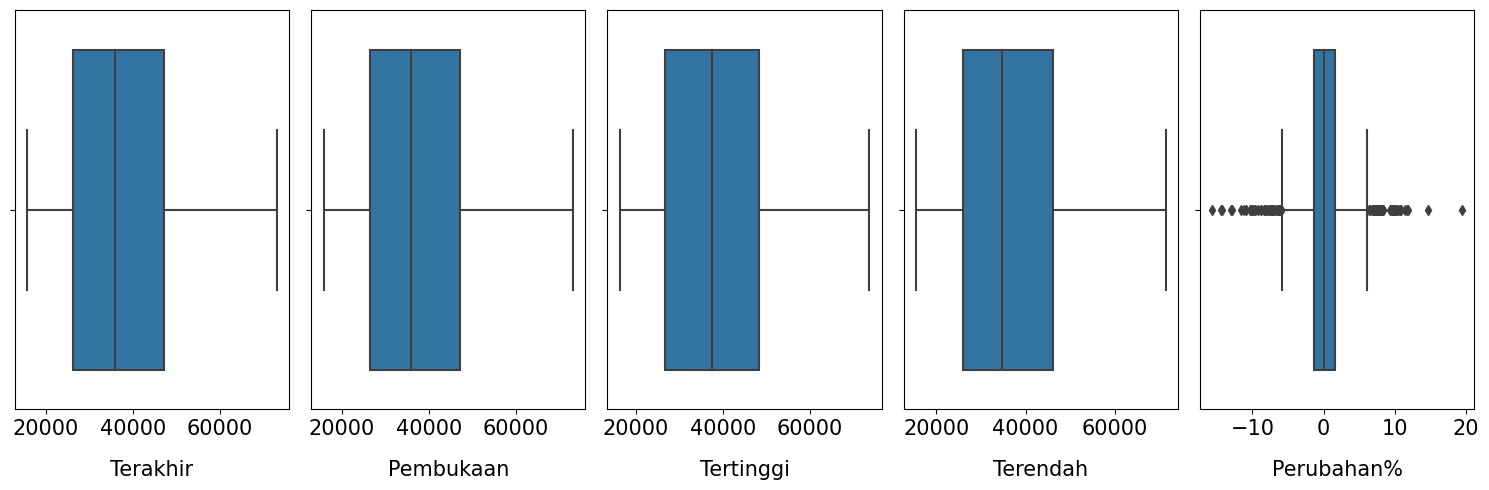

In [13]:
fig, axes = plt.subplots(1,5, figsize = (15,5))

for i,ax,j in zip(df[['Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah','Perubahan%']], axes.flatten(), range(0,5)):
    sns.boxplot(x=df[i], ax=ax, orient = 'h')
    axes[j].tick_params(axis = 'x', labelsize = 15)
    axes[j].set_xlabel(i, fontsize = 15, labelpad = 15)
    plt.tight_layout()

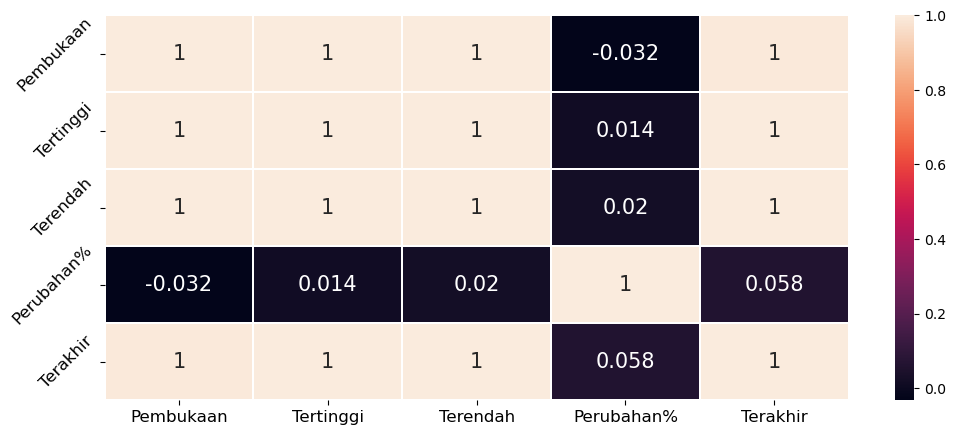

In [14]:
plt.figure(figsize=(12,5))
sns.heatmap(df[['Pembukaan', 'Tertinggi', 'Terendah', 'Perubahan%', 'Terakhir']].corr(), annot = True, annot_kws = {'fontsize':15}, linewidth = 0.1)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12, rotation = 45)
plt.show()

C:\Users\MSI-GAMING\AppData\Local\Temp\ipykernel_15984\908556174.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


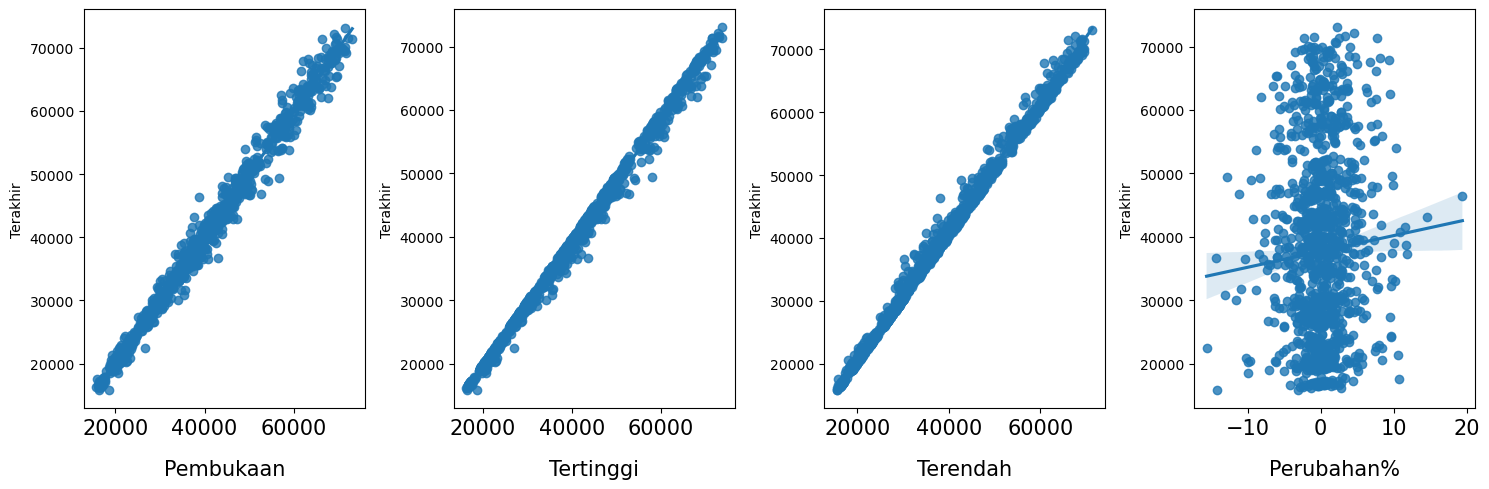

In [15]:
fig, axes = plt.subplots(1,4, figsize = (15,5))

for i,ax,j in zip(df[['Pembukaan', 'Tertinggi', 'Terendah','Perubahan%']], axes.flatten(), range(0,4)):
    sns.regplot(data = df, x=df[i], y = df['Terakhir'], ax=ax)
    axes[j].tick_params(axis = 'x', labelsize = 15)
    axes[j].set_xlabel(i, fontsize = 15, labelpad = 15)
    plt.tight_layout()

Berdasarkan hasil exploratory data didapatkan informasi sebagai berikut
1. Terdapat total 1248 data yang digunakan (Tahun 2021 - Tahun 2024)
2. Tidak terdapat missing value pada data
3. Sebelumnya data bersifat objektif yang diperlukan perubahan ke numerik (done)
4. Dari features yang digunakan, hanya feature Perubahan% yang terdapat nilai outlier
5. Berdasarkan hasil korelasi antar feature dan uji regressi feature pembukaan, tertinggi, terendah, dan terakhir memiliki korelasi yang sangat kuat dengan secara nilai korelasi bernilai 1 (100%)

In [16]:
df_filter = df[['Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah']]
df_filter

,Terakhir,Pembukaan,Tertinggi,Terendah
Tanggal,,,,
01/01/2021,29359.9,28951.7,29627.1,28712.4
02/01/2021,32193.3,29359.7,33233.5,29008.0
03/01/2021,32958.9,32192.9,34755.9,32029.6
04/01/2021,32022.6,33016.6,33587.5,28204.5
05/01/2021,33991.5,32015.4,34414.7,30010.5
...,...,...,...,...
28/05/2024,68366.0,69428.3,69560.7,67299.9
29/05/2024,67635.8,68366.2,68897.6,67143.2
30/05/2024,68354.7,67631.3,69504.7,67138.4


# Data Processing 

In [17]:
scaler_x = RobustScaler()
scaler_y = RobustScaler()

scaler_x.fit(df[['Pembukaan', 'Tertinggi', 'Terendah']])
scaler_y.fit(df[['Terakhir']])

RobustScaler()

In [18]:
df_filter_scaler = pd.DataFrame(scaler_x.transform(df[['Pembukaan', 'Tertinggi', 'Terendah']]), 
                               columns = [['Pembukaan', 'Tertinggi', 'Terendah']])
df_filter_scaler['Terakhir'] = scaler_y.transform(df[['Terakhir']])

In [19]:
df_filter_scaler

,Pembukaan,Tertinggi,Terendah,Terakhir
0,-0.331857,-0.359950,-0.298734,-0.319714
1,-0.312230,-0.193007,-0.284087,-0.183411
2,-0.175936,-0.122534,-0.134371,-0.146581
3,-0.136311,-0.176620,-0.323899,-0.191623
4,-0.184475,-0.138328,-0.234414,-0.096907
...,...,...,...,...
1243,1.615311,1.488606,1.613224,1.556709
1244,1.564217,1.457910,1.605459,1.521582
1245,1.528864,1.486013,1.605221,1.556165
1246,1.563549,1.463493,1.582350,1.516497


In [20]:
X = df_filter_scaler [['Pembukaan', 'Tertinggi', 'Terendah']]
y = df_filter_scaler['Terakhir']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, shuffle = False)

In [21]:
X_train = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))

In [22]:
X_train

array([[[-0.33185688, -0.35994973, -0.29873354]],

       [[-0.31222963, -0.19300686, -0.28408697]],

       [[-0.17593569, -0.12253386, -0.13437088]],

       ...,

       [[ 0.19684256,  0.22274402,  0.25218757]],

       [[ 0.28677674,  0.22167933,  0.33056357]],

       [[ 0.30167998,  0.25062492,  0.34225704]]])

# Model

# Neural Network

In [23]:
model1 = keras.Sequential([
    keras.layers.Dense(units = 32, activation = 'relu'),
    keras.layers.Dense(units = 64, activation = 'relu'),
    keras.layers.Dense(units = 128, activation = 'relu'),
    keras.layers.Dense(1)
])

model1.compile(loss = tf.keras.losses.mse, optimizer = 'adam', metrics = ['mse'])
model1.fit(X_train, y_train, epochs = 150, batch_size = 128)

Epoch 1/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.2941 - mse: 0.2941
Epoch 2/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0722 - mse: 0.0722
Epoch 3/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0069 - mse: 0.0069 
Epoch 4/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0090 - mse: 0.0090
Epoch 5/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mse: 0.0033 
Epoch 6/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0027 - mse: 0.0027
Epoch 7/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0017 - mse: 0.0017
Epoch 8/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015 - mse: 0.0015 
Epoch 9/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0013 - mse: 0.0013
Epoch 10/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - mse: 0.0012 
Epoch 11/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0012 - mse: 0.0012
Epoch 12/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0011 - mse: 0.0011
Epoch 13/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - l

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.1179e-04 - mse: 6.1179e-04 
Epoch 70/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.7226e-04 - mse: 6.7226e-04
Epoch 71/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.2868e-04 - mse: 6.2868e-04
Epoch 72/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.8485e-04 - mse: 5.8485e-04 
Epoch 73/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.9306e-04 - mse: 5.9306e-04 
Epoch 74/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.8350e-04 - mse: 5.8350e-04
Epoch 75/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.8747e-04 - mse: 6.8747e-04 
Epoch 76/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.2826e-04 - mse: 6.2826e-04
Epoch 77/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.0776e-04 - mse: 6.0776e-04
Epoch 78/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.6465e-04 - mse: 6.6465e-04
Epoch 79/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.5304e-04 - mse: 6.5304e-04
Epoch 80/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.3449e-04 - mse: 6.3449e-04 
Epoch 137/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.5442e-04 - mse: 5.5442e-04
Epoch 138/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.9039e-04 - mse: 5.9039e-04
Epoch 139/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.9742e-04 - mse: 5.9742e-04 
Epoch 140/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.0351e-04 - mse: 6.0351e-04
Epoch 141/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.2786e-04 - mse: 5.2786e-04
Epoch 142/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.7647e-04 - mse: 6.7647e-04
Epoch 143/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.6480e-04 - mse: 5.6480e-04
Epoch 144/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.8152e-04 - mse: 5.8152e-04
Epoch 145/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.7873e-04 - mse: 5.7873e-04
Epoch 146/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.8979e-04 - mse: 5.8979e-04 
Epoch 147/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0

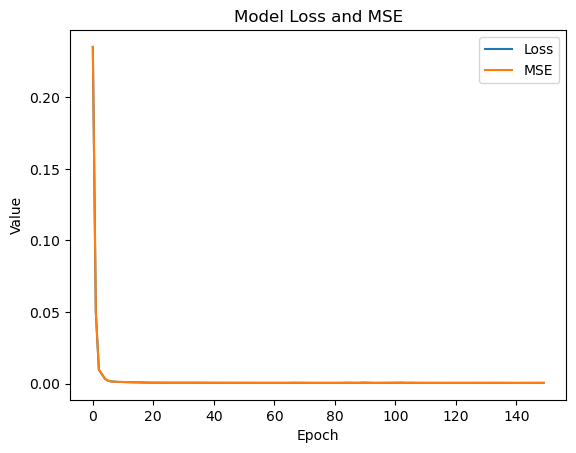

In [24]:
plt.plot(model1.history.history['loss'], label='Loss')
plt.plot(model1.history.history['mse'], label='MSE')
plt.title('Model Loss and MSE')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend(loc='upper right')
plt.show()

# LSTM

In [25]:
model2 = keras.Sequential([
    keras.layers.Input(shape=(1, X_train.shape[2])),
    keras.layers.LSTM(units=32, activation='relu', return_sequences=True),
    keras.layers.LSTM(units=64, activation='relu', return_sequences=True),
    keras.layers.LSTM(units=128, activation='relu'),
    keras.layers.Dense(1)
])

model2.compile(loss = tf.keras.losses.mse, optimizer = 'adam', metrics = ['mse'])
model2.fit(X_train, y_train, epochs = 150, batch_size = 128)

Epoch 1/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.3477 - mse: 0.3477
Epoch 2/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3540 - mse: 0.3540
Epoch 3/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3499 - mse: 0.3499
Epoch 4/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3383 - mse: 0.3383
Epoch 5/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3028 - mse: 0.3028
Epoch 6/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2535 - mse: 0.2535
Epoch 7/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1850 - mse: 0.1850
Epoch 8/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0829 - mse: 0.0829
Epoch 9/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0125 - mse: 0.0125
Epoch 10/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0164 - mse: 0.0164
Epoch 11/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0059 - mse: 0.0059
Epoch 12/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0067 - mse: 0.0067
Epoch 13/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0015 - mse: 0.0015
Epoch 74/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015 - mse: 0.0015 
Epoch 75/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0014 - mse: 0.0014
Epoch 76/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016 - mse: 0.0016
Epoch 77/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0014 - mse: 0.0014
Epoch 78/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0014 - mse: 0.0014
Epoch 79/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0014 - mse: 0.0014
Epoch 80/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0015 - mse: 0.0015
Epoch 81/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0015 - mse: 0.0015
Epoch 82/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0014 - mse: 0.0014
Epoch 83/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0013 - mse: 0.0013
Epoch 84/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0013 - mse: 0.0013
Epoch 85/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.00

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.2734e-04 - mse: 8.2734e-04
Epoch 144/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.2165e-04 - mse: 9.2165e-04
Epoch 145/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.8711e-04 - mse: 8.8711e-04
Epoch 146/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.0896e-04 - mse: 8.0896e-04
Epoch 147/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.4360e-04 - mse: 8.4360e-04
Epoch 148/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.7489e-04 - mse: 8.7489e-04
Epoch 149/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.8107e-04 - mse: 7.8107e-04
Epoch 150/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.7609e-04 - mse: 8.7609e-04 


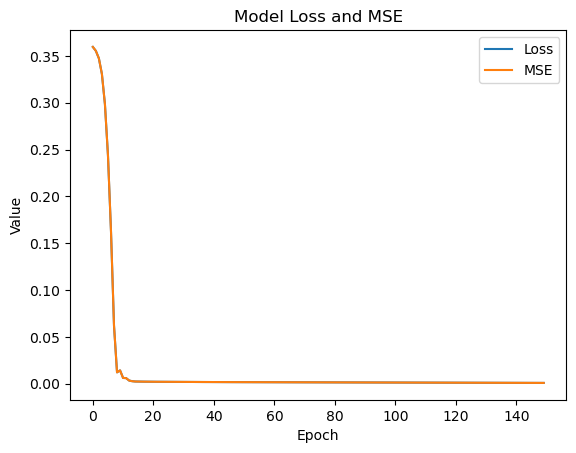

In [26]:
plt.plot(model2.history.history['loss'], label='Loss')
plt.plot(model2.history.history['mse'], label='MSE')
plt.title('Model Loss and MSE')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend(loc='upper right')
plt.show()

# Prediksi

In [27]:
y_pred_model1 = model1.predict(X_test)
y_pred_model2 = model2.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 375ms/step


In [28]:
from sklearn.metrics import mean_squared_error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [29]:
df_prediksi = pd.DataFrame({
    'y_test':scaler_y.inverse_transform(y_test).flatten(),
    'y_predik_NN':scaler_y.inverse_transform(y_pred_model1.reshape(y_pred_model1.shape[0],y_pred_model1.shape[2])).flatten(),
    'y_predik_LSTM':scaler_y.inverse_transform(y_pred_model2).flatten()
})

df_prediksi

,y_test,y_predik_NN,y_predik_LSTM
0,43299.8,42764.625000,42647.453125
1,42946.2,43127.347656,43120.929688
2,42580.5,42999.210938,42941.402344
3,43081.4,42528.484375,42429.718750
4,43194.7,42859.164062,42855.140625
...,...,...,...
120,68366.0,67639.773438,68879.273438
121,67635.8,67534.929688,68382.718750
122,68354.7,68330.296875,68850.578125
123,67530.1,67317.343750,68132.937500


In [30]:
rmse_NN = np.sqrt(mean_squared_error(df_prediksi['y_test'].values, df_prediksi['y_predik_NN'].values))
rmse_LSTM = np.sqrt(mean_squared_error(df_prediksi['y_test'].values, df_prediksi['y_predik_LSTM'].values))

mape_NN = mean_absolute_percentage_error(df_prediksi['y_test'].values, df_prediksi['y_predik_NN'].values)
mape_LSTM = mean_absolute_percentage_error(df_prediksi['y_test'].values, df_prediksi['y_predik_LSTM'].values)

In [31]:
data =  ({
    'parameter':['RMSE NN', 'RMSE LSTM', 'MAPE NN', 'MAPE LSTM'],
    'value':[np.round(rmse_NN,2),np.round(rmse_LSTM,2),np.round(mape_NN,2),np.round(mape_LSTM,2)]
    
}) 

In [32]:
df_evaluasi = pd.DataFrame(data)

In [33]:
df_evaluasi

,parameter,value
0,RMSE NN,754.77
1,RMSE LSTM,944.22
2,MAPE NN,0.93
3,MAPE LSTM,1.15


In [34]:
train = df[['Terakhir']].iloc[:1123,:]
test = df[['Terakhir']].iloc[1123:,:]

In [35]:
test

,Terakhir
Tanggal,
29/01/2024,43299.8
30/01/2024,42946.2
31/01/2024,42580.5
01/02/2024,43081.4
02/02/2024,43194.7
...,...
28/05/2024,68366.0
29/05/2024,67635.8
30/05/2024,68354.7


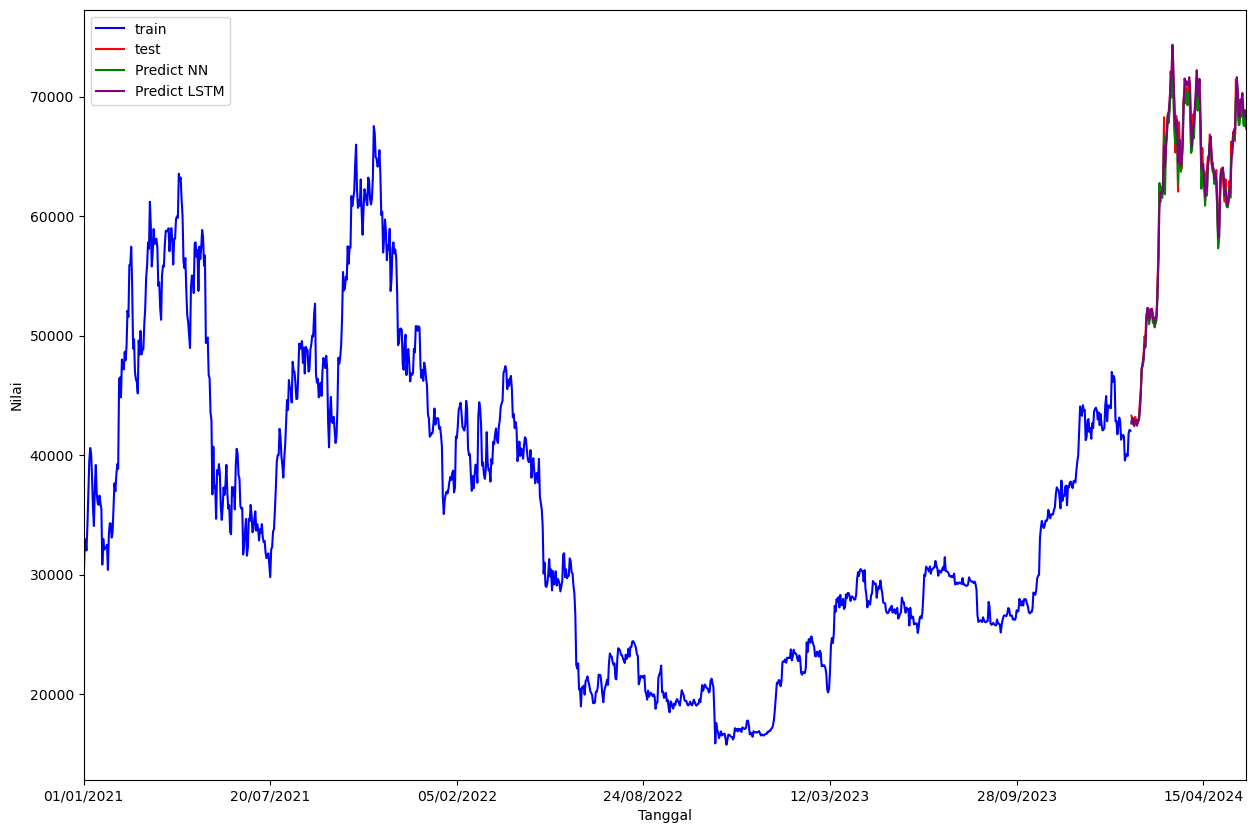

In [36]:
plt.figure(figsize = (15,10))
plt.plot(train.index, train.values.flatten(), label = 'train', color = 'blue')
plt.plot(test.index, test.values.flatten(), label = 'test', color = 'red')
plt.plot(test.index, df_prediksi['y_predik_NN'].values, label = 'Predict NN', color = 'green')
plt.plot(test.index, df_prediksi['y_predik_LSTM'].values, label = 'Predict LSTM', color = 'purple')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.xlim(train.index.min(), test.index.max())
ticks = ['01/01/2021', '20/07/2021', '05/02/2022', '24/08/2022', '12/03/2023', '28/09/2023', '15/04/2024']
plt.legend(loc='upper left')
plt.xticks(ticks)
plt.show()

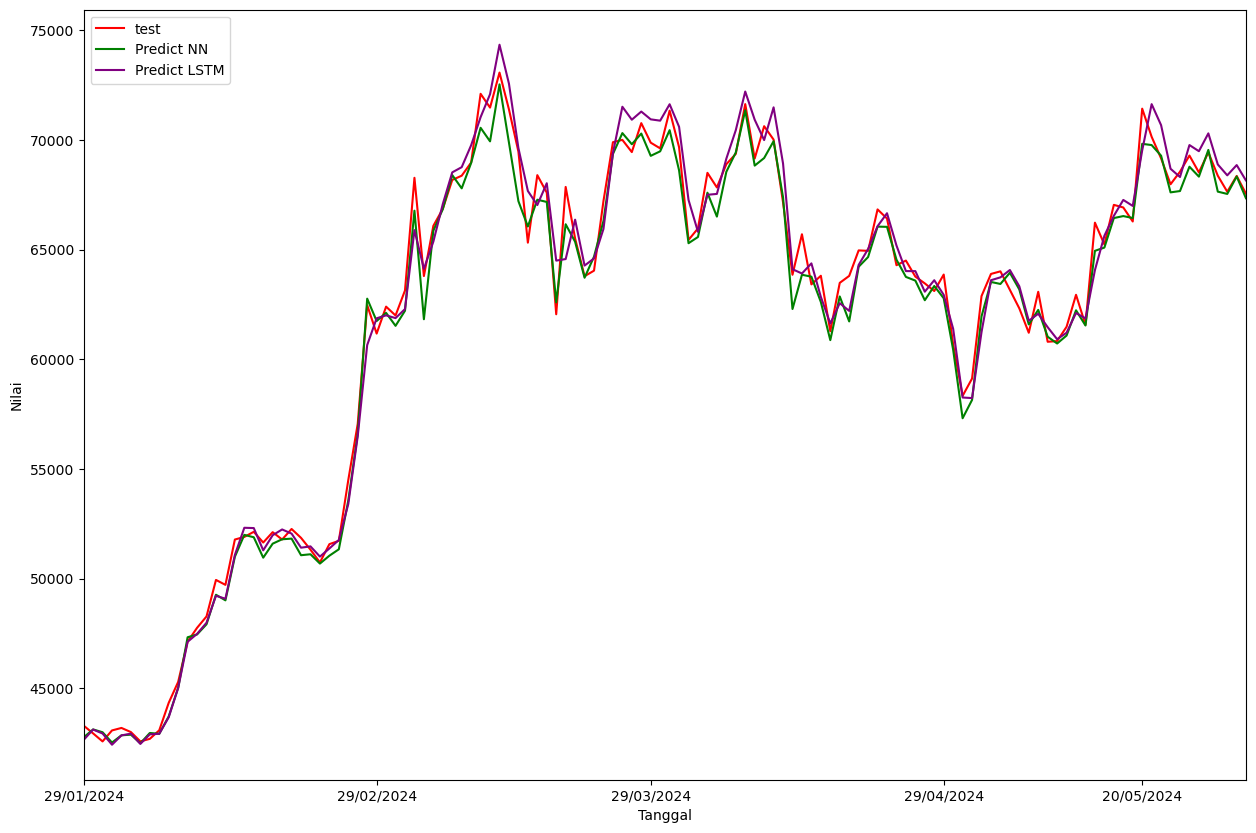

In [37]:
plt.figure(figsize = (15,10))
plt.plot(test.index, test.values.flatten(), label = 'test', color = 'red')
plt.plot(test.index, df_prediksi['y_predik_NN'].values, label = 'Predict NN', color = 'green')
plt.plot(test.index, df_prediksi['y_predik_LSTM'].values, label = 'Predict LSTM', color = 'purple')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.xlim(test.index.min(), test.index.max())
ticks = ['29/01/2024','29/02/2024','29/03/2024', '29/04/2024','20/05/2024']
plt.legend(loc='upper left')
plt.xticks(ticks)
plt.show()